# RepPlot library showroom

This notebook demonstrates the possibilites in the utils library in this repo. It is organized in the following way:

* Matplotlib plots
* Bokeh plots, which are in-line in the notebook as well as stored externally.

The `utils` library runs under continuous intergration using Travis over Github, using unit tests similar to this notebook.

It is based on pivoted data, meaning that the columns are categories, while indexes are normally `date_range` type. But it also provides functionality to pivot the data if it stacked.



In [15]:
import reportlib as rep
import pandas as pd
import numpy as np

df = pd.DataFrame(columns=['bacon', 'spam', 'beans', 'ham'], index=pd.date_range(start='2015-01-01', end='2018-01-01'))
t = np.array(range(len(df)))
for c in df.columns:
    df.loc[:, c] = np.random.random(1)*np.sin(2*np.pi*t/len(df)) + np.random.random(len(df))
    
df.head()

,bacon,spam,beans,ham
2015-01-01,0.922722,0.935955,0.964487,0.581312
2015-01-02,0.728047,0.326654,0.100131,0.854022
2015-01-03,0.914743,0.721978,0.538108,0.714354
2015-01-04,0.048653,0.574960,0.511197,0.010363
2015-01-05,0.184549,0.563143,0.263026,0.284432


## 1) Matplotlib plots

### 1.1) plot_cat()
`plot_cat()` plots the data and can be parametrized to smooth it (to see overall patterns on noisy data) and plot the std as well. For data indexed by date, it can also plot the weekday.

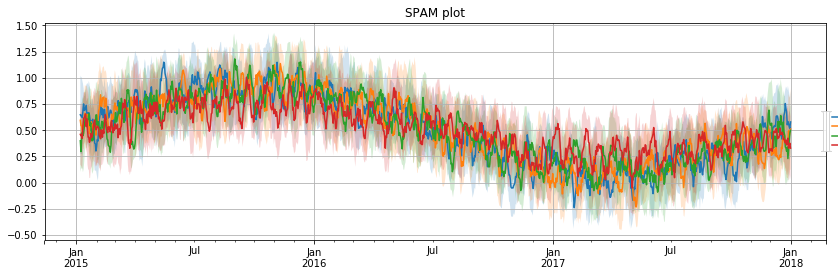

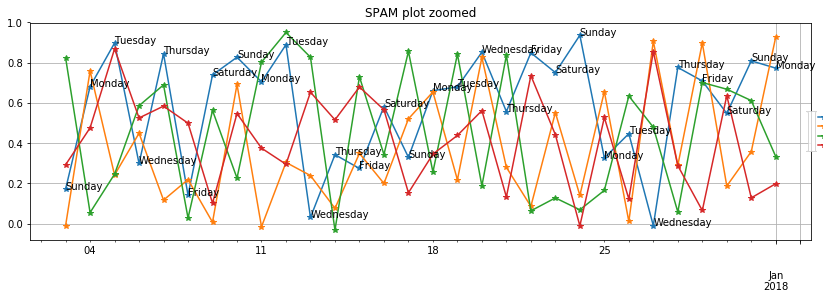

In [19]:
rep.plot_cat(df, smooth_period=7, plot_std=True, plot_original=False, title='SPAM plot', marker=None)
rep.plot_cat(df.iloc[-30:], plot_original=False, title='SPAM plot zoomed', marker='*', show_weekday_on='bacon')

### 1.2) plot_fft()
Plots the Fourier Transform of a series or a number of series

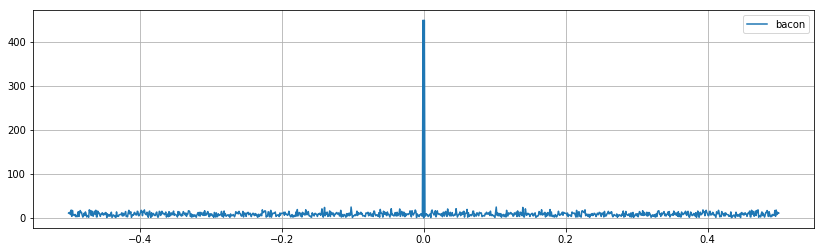

In [3]:
rep.plot_cat_fft(df[['bacon']])

### 1.3) plot_acf()
Plots the autocorrelation function including the number of lags to plot.

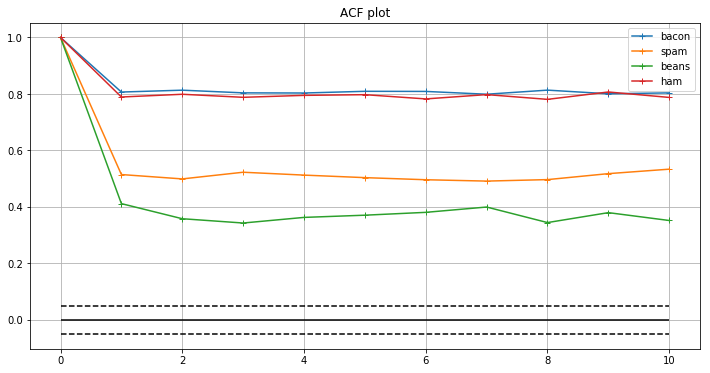

In [4]:
rep.plot_acf_df(df, 10)

### 1.4) plot_delta()
Plots a delta analysis of a signal wrt to other ones. It also provides a density plots of the deltas.

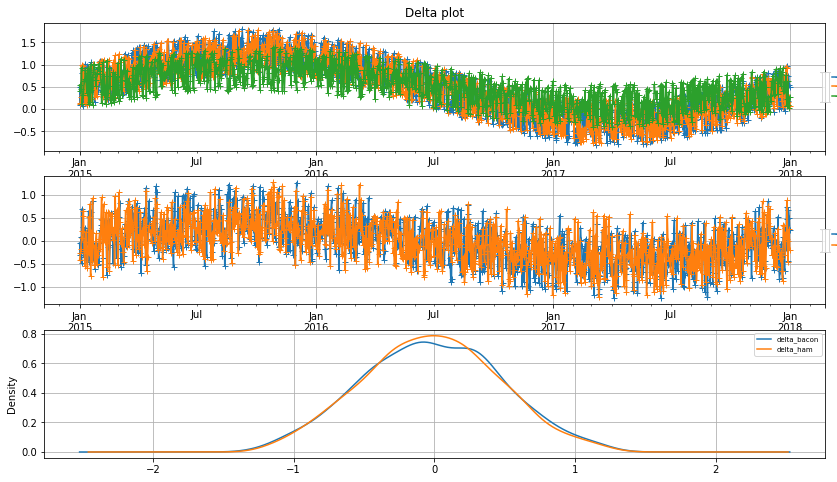

In [5]:
rep.plot_delta(df, ['bacon', 'ham'], 'spam')

## 2) Bokeh plots

### 2.1) Category plots

In [6]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

p = rep.plot_cat_bokeh(df, width=900, title='Spam plot in Bokeh')  # returns a bokeh figure
print(type(p))
show(p)

Loading BokehJS ...

<class 'bokeh.plotting.figure.Figure'>


### 2.2) Histogram plots

In [7]:
p = rep.plot_hist_bokeh(df, title='Histogram of SPAM plot in Bokeh')
show(p)

### 2.3) Autocorrelation plots

In [8]:
p = rep.plot_acf_bokeh(df)
show(p)

In [9]:
import os
from bokeh.embed import components

# print to file
rep.generate_delta_report(df, ['bacon', 'ham'], 'spam', save_to='showroom_delta_report.html')
print('File written: {}'.format('showroom_delta_report.html' in os.listdir('.')))
# show delta report in-line
p = rep.generate_delta_report(df, ['bacon', 'ham'], 'spam', save_to=None)
print(type(p))
show(p)

INFO:bokeh.io.state:Session output file 'showroom_delta_report.html' already exists, will be overwritten.


File written: True
<class 'bokeh.models.layouts.Column'>


In [10]:
# print to file
rep.generate_error_report(df, title='Bokeh error report', save_to='showroom_error_report.html')
print('File written: {}'.format('showroom_error_report.html' in os.listdir('.')))
# show delta report in-line
p = rep.generate_error_report(df, title='Bokeh error report', save_to=None)
print(type(p))
show(p, notebook_handle=True)

File written: True
<class 'bokeh.models.layouts.Column'>


In [11]:
p = rep.plot_scatter_bokeh(df, x='spam', y='bacon', c='beans', s='ham', title='Bokeh cluster')
print(type(p))
show(p, notebook_handle=True)

<class 'bokeh.plotting.figure.Figure'>


In [12]:
p = rep.plot_boxplot_bokeh(df)
print(type(p))
show(p, notebook_handle=True)

<class 'bokeh.plotting.figure.Figure'>
